In [1]:
import pandas as pd
import numpy as np
import csv
import re
from gensim.models import Word2Vec

#  Work2Vec

In [3]:
words=[]
path_full = 'data/clean_gensim.csv'
print('Load data...')  
with open(path_full) as Train:
    reader = csv.reader(Train)
    for line in reader:
        words.append(line)


Load data...


In [4]:
Finalword=[]
for i in range(312735):
    for word in words[i]:
        tokens = re.sub(r"[^a-z0-9]+", " ", word.lower()).split()
        Finalword.append(tokens)
# print(Finalword)   

In [5]:
model = Word2Vec(Finalword,min_count=10000)
X = model[model.wv.vocab]

/Users/suhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [6]:
print(X)

[[ 0.23649684 -0.8806978   0.5792133  ... -0.17858544 -0.8655837
   0.16379754]
 [ 0.21411729 -0.20857294  0.16084248 ...  0.80676204 -0.52643186
  -0.8943937 ]
 [-0.20807469 -0.52960855  1.4514246  ... -0.48583138  0.18180032
   1.9031434 ]
 ...
 [ 0.09717561 -2.0753438  -0.8252501  ...  0.04319691 -0.54176337
   0.7519038 ]
 [ 1.2093564  -0.8495488  -0.20430891 ... -0.3469547   0.9155268
   0.9706976 ]
 [-1.893827   -1.2598825   1.5156418  ... -2.2214532   1.1833155
   1.8003552 ]]


In [7]:
np.save('word2vec.npy',X)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [7]:
print(np.shape(result))

(144, 2)


(144,)


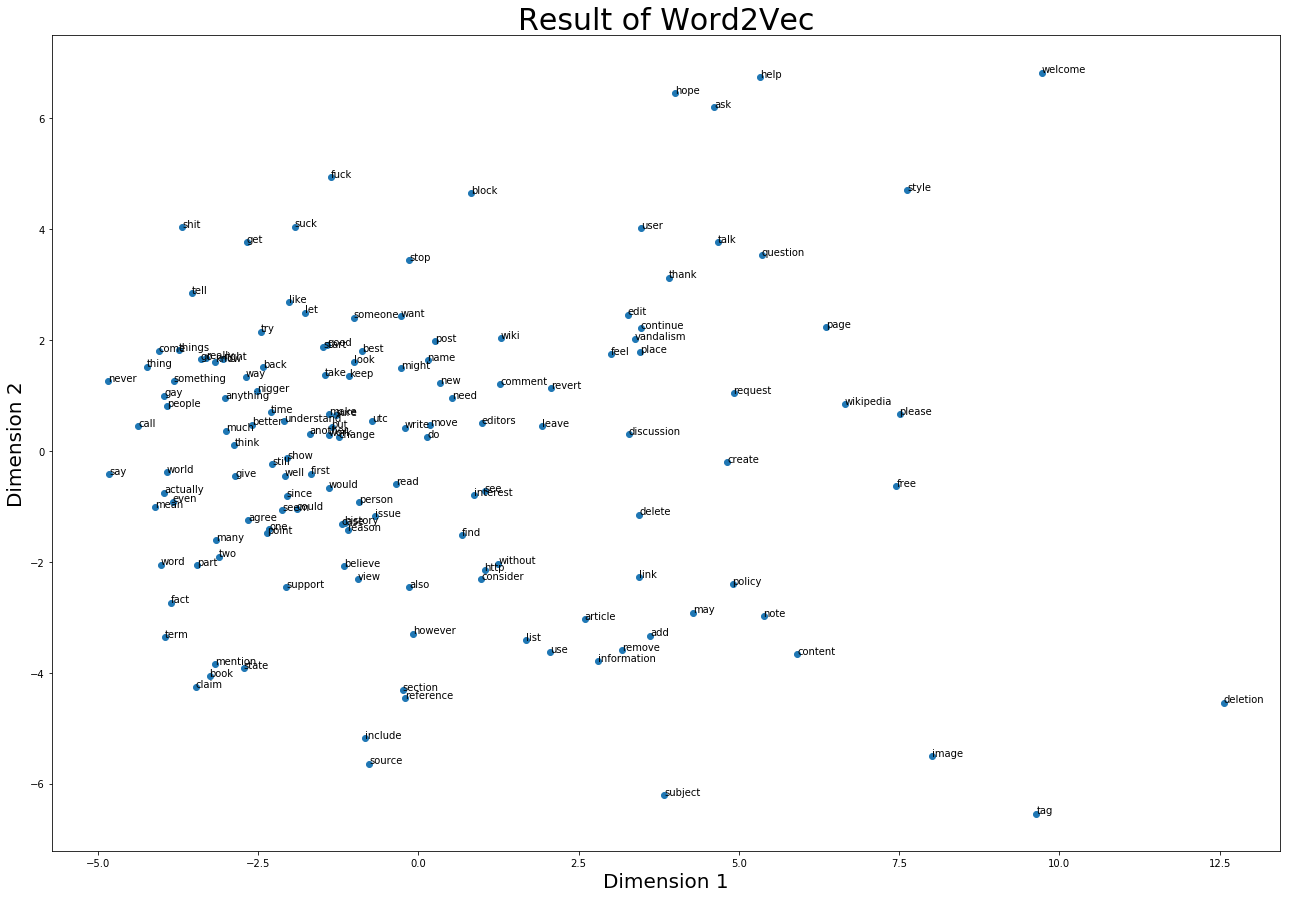

In [21]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(22, 15))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
print(np.shape(words))
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.xlabel('Dimension 1', fontsize=20)
plt.ylabel('Dimension 2', fontsize=20)
plt.title("Result of Word2Vec", fontsize=30)
plt.show()  